#Problem Statement 1:

Data Filtering using Pandas

Write a Python program that reads the player.csv  file into a DataFrame, then shows only those players who played more than 150 innings and scored at least two centuries and 35 fifties.

In [1]:
#Reading file and converting into dataframe
import pandas as pd
import numpy as np
df = pd.read_csv('player.csv',index_col='rank')
df

,name,matches,innings,runs,highest,100s,50s
rank,,,,,,,
1,V Kohli,207,199,6283,113,5,42
2,S Dhawan,194,191,5784,106,2,44
3,Rohit Sharma,213,208,5611,109,1,40
4,Suresh Raina,205,200,5528,100,1,39
5,David Warner,150,150,5449,126,4,50
6,A B de Villiers,184,170,5162,133,3,40
7,Chris Gayle,142,141,4965,175,6,31
8,M S Dhoni,220,193,4746,84,0,23
9,Robin Uthappa,193,186,4722,87,0,25


In [2]:
# In the next, we have to apply 3 conditions on dataset and find the filtered data
#1. Players(Innings>150)
#2. Players(100s>=2)
#3. Players(50s>=35)

df[df['innings']>150]

,name,matches,innings,runs,highest,100s,50s
rank,,,,,,,
1,V Kohli,207,199,6283,113,5,42
2,S Dhawan,194,191,5784,106,2,44
3,Rohit Sharma,213,208,5611,109,1,40
4,Suresh Raina,205,200,5528,100,1,39
6,A B de Villiers,184,170,5162,133,3,40
8,M S Dhoni,220,193,4746,84,0,23
9,Robin Uthappa,193,186,4722,87,0,25
10,Gutam Gambhir,154,152,4217,93,0,36


In [3]:
df[df['100s']>=2]

,name,matches,innings,runs,highest,100s,50s
rank,,,,,,,
1,V Kohli,207,199,6283,113,5,42
2,S Dhawan,194,191,5784,106,2,44
5,David Warner,150,150,5449,126,4,50
6,A B de Villiers,184,170,5162,133,3,40
7,Chris Gayle,142,141,4965,175,6,31


In [4]:
df[df['50s']>=35]

,name,matches,innings,runs,highest,100s,50s
rank,,,,,,,
1,V Kohli,207,199,6283,113,5,42
2,S Dhawan,194,191,5784,106,2,44
3,Rohit Sharma,213,208,5611,109,1,40
4,Suresh Raina,205,200,5528,100,1,39
5,David Warner,150,150,5449,126,4,50
6,A B de Villiers,184,170,5162,133,3,40
10,Gutam Gambhir,154,152,4217,93,0,36


In [5]:
final_result = df[(df['innings']>150)&(df['100s']>=2)&(df['50s']>=35)]
final_result

,name,matches,innings,runs,highest,100s,50s
rank,,,,,,,
1,V Kohli,207,199,6283,113,5,42
2,S Dhawan,194,191,5784,106,2,44
6,A B de Villiers,184,170,5162,133,3,40


#Problem Statement 2:

1.Remove the data of players who didn't score a single century

2.Replace the player name "V Kohli " with "Virat Kohli “

3.How many matches they weren't getting a chance for batting to fetch that and stored in a new column and named it as “not batting”

4.Fetch  data  where  they  scored  neither  100  nor  50  in  matches  and store itin the new column as renamed as “low score innings”

In [6]:
#1. Removing data of players not scoring a single century
sc = df[df['100s']>0]
sc

,name,matches,innings,runs,highest,100s,50s
rank,,,,,,,
1,V Kohli,207,199,6283,113,5,42
2,S Dhawan,194,191,5784,106,2,44
3,Rohit Sharma,213,208,5611,109,1,40
4,Suresh Raina,205,200,5528,100,1,39
5,David Warner,150,150,5449,126,4,50
6,A B de Villiers,184,170,5162,133,3,40
7,Chris Gayle,142,141,4965,175,6,31


In [7]:
#2. Replacing V Kohli with Virat Kohli
vk = df[df['name'] == 'V Kohli'].replace({'V Kohli':'Virat Kohli'})
vk

,name,matches,innings,runs,highest,100s,50s
rank,,,,,,,
1,Virat Kohli,207,199,6283,113,5,42


In [8]:
#3. To get the no. of matches they were not batting we have to no. of matches played(innings) from total no. of matches(matches)
df['not batting'] = df['matches']-df['innings']
df['not batting']

rank
1      8
2      3
3      5
4      5
5      0
6     14
7      1
8     27
9      7
10     2
Name: not batting, dtype: int64

In [9]:
#4. To get data where they scored neither 50s nor 100s, we have subtract each player inninngs by their respective 100s and 50s
df['low_score_innings'] = df['innings']-(df['100s']+df['50s'])
df['low_score_innings']

rank
1     152
2     145
3     167
4     160
5      96
6     127
7     104
8     170
9     161
10    116
Name: low_score_innings, dtype: int64

Problem Statement 3: 

Combining DataFrames -

Write a Python program with two DataFrames, with columns “name” and “age”. Now,  combine  both  the  DataFrames  vertically  using  the concat()function, without the duplicate rows, and print the final DataFrame.

Input Format:You do not need to read any input in this problem

In [10]:
Data1 = pd.DataFrame({

        'name':['Adarsh','Vansh','Tanmay'],
        'age':['20','21','22']
}
)

Data2 = pd.DataFrame({
 
        'name':['Abhay','Rahul','Sanskar'],
        'age':['23','24','25']
}   
)

#Combining both Data1&Data2 vertically using concat()
#by default it combines vertically with axis=0 and for horizontally we use axis=1
real = pd.concat([Data1,Data2]).drop_duplicates()
real

,name,age
0,Adarsh,20
1,Vansh,21
2,Tanmay,22
0,Abhay,23
1,Rahul,24
2,Sanskar,25


In [11]:
#Reset the index to start from 0
real = real.reset_index(drop=True)
real

,name,age
0,Adarsh,20
1,Vansh,21
2,Tanmay,22
3,Abhay,23
4,Rahul,24
5,Sanskar,25


Problem Statement 4: Combining DataFrames -

Write  a  Python  programto  create  two  DataFrames.  First  DataFrame  with columns “employee”and “department,”Second  DataFrame  with  columns “employee”and “joining_date,” and Perform the following tasks:

1.Merge the DataFrames based on the “employee”column

2.Display the final DataFrame with employees records who are working in the “Engineering” department

In [12]:
Data3 = pd.DataFrame({

        'employee':['Abhay','Rahul','Sanskar'],
        'department':['Engineering','Sales','HR']
}
)

Data4 = pd.DataFrame({
 
        'employee':['Abhay','Rahul','Sanskar'],
        'joining_date':['23','24','25']
}   
)
#1. Merging based on 'employee' column
merged_result = pd.merge(Data3, Data4, on='employee')
merged_result

,employee,department,joining_date
0,Abhay,Engineering,23
1,Rahul,Sales,24
2,Sanskar,HR,25


In [13]:
#2. Employee working in 'Engineering'
engineering_result = merged_result[merged_result['department'] == 'Engineering']
engineering_result


,employee,department,joining_date
0,Abhay,Engineering,23


Problem Statement 5: 

Data Grouping -

Load the “big_bang_theory.csv”dataset   into  a  DataFrame, group the data based on column "directed_by"using the groupby()function and  the  grouped  DataFrame.  Now  alsoprint  all  the  episodes  and  the  data associated with them, which belongs to the director -Mark Cendroski

In [16]:
#Loading data
df = pd.read_csv('big_bang_theory_episodes.csv')
df

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,Pilot,James Burrows,Chuck Lorre & Bill Prady,2007-09-24,276023,9520000.0
1,1,2,2,The Big Bran Hypothesis,Mark Cendrowski,Story by: Chuck Lorre & Bill PradyTeleplay by:...,2007-10-01,3T6601,8580000.0
2,1,3,3,The Fuzzy Boots Corollary,Mark Cendrowski,Story by: Chuck LorreTeleplay by: Bill Prady &...,2007-10-08,3T6602,8360000.0
3,1,4,4,The Luminous Fish Effect,Mark Cendrowski,Story by: Chuck Lorre & Bill PradyTeleplay by:...,2007-10-15,3T6603,8150000.0
4,1,5,5,The Hamburger Postulate,Andrew D. Weyman,Story by: Jennifer GlickmanTeleplay by: Dave G...,2007-10-22,3T6604,8810000.0
...,...,...,...,...,...,...,...,...,...
274,12,20,275,The Decision Reverberation,Mark Cendrowski,Story by: Steven Molaro & Steve Holland & Tara...,2019-04-25,T12.16020,11840000.0
275,12,21,276,The Plagiarism Schism,Nikki Lorre,Story by: Eric Kaplan & Maria Ferrari & Adam F...,2019-05-02,T12.16021,12480000.0
276,12,22,277,The Maternal Conclusion,Kristy Cecil,Story by: Steve Holland & Eric Kaplan & Jeremy...,2019-05-09,T12.16022,12590000.0
277,12,23,278,The Change Constant,Mark Cendrowski,Chuck Lorre & Steve Holland & Steven Molaro & ...,2019-05-16,T12.16023,18520000.0


In [17]:
#Grouping data based on'Directedby'
group = df.groupby('directed_by')
name = 'Mark Cendrowski'
if name in group.groups:
    episodes = group.get_group(name)
    print(f"Episodes directed by {name}:\n")
    print(episodes)

Episodes directed by Mark Cendrowski:

     season  episode_num_in_season  episode_num_overall  \
1         1                      2                    2   
2         1                      3                    3   
3         1                      4                    4   
5         1                      6                    6   
6         1                      7                    7   
..      ...                    ...                  ...   
272      12                     18                  273   
273      12                     19                  274   
274      12                     20                  275   
277      12                     23                  278   
278      12                     24                  279   

                           title      directed_by  \
1        The Big Bran Hypothesis  Mark Cendrowski   
2      The Fuzzy Boots Corollary  Mark Cendrowski   
3       The Luminous Fish Effect  Mark Cendrowski   
5      The Middle Earth Paradigm  Mark C

Problem Statement: Data Grouping -

Load the “big_bang_theory.csv”dataset  into  a  DataFrame; Group  the data based  on  two columns, "directed_by" and "written_by," using the groupby()function and print  the  grouped DataFrame.Also,  print  the average viewers in the United Statesand thedirector andthewriter'sdetails.

In [18]:
group_df = df.groupby(['directed_by', 'written_by'])

print(group_df.head)

average_viewers_us = df['us_viewers'].mean()
print(f"\nAverage Viewers in the United States: {average_viewers_us:.2f} million")

for (director, writer), group_data in group_df:
    print(f"\nDirector: {director}, Writer: {writer}")

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002131D2B8C70>>

Average Viewers in the United States: 14646308.24 million

Director: Andrew D. Weyman, Writer: Story by: Jennifer GlickmanTeleplay by: Dave Goetsch & Steven Molaro

Director: Anthony Rich, Writer: Chuck Lorre & Bill Prady & Lee Aronsohn & Steven Molaro

Director: Anthony Rich, Writer: Story by: Bill Prady & Eric Kaplan & Jim ReynoldsTeleplay by: Steven Molaro & Dave Goetsch & Steve Holland

Director: Anthony Rich, Writer: Story by: Chuck Lorre & Bill Prady & Dave GoetschTeleplay by: Lee Aronsohn & Steven Molaro & Steve Holland

Director: Anthony Rich, Writer: Story by: Chuck Lorre & Bill Prady & Steve HollandTeleplay by: Steven Molaro & Eric Kaplan & Anthony Del Broccolo

Director: Anthony Rich, Writer: Story by: Chuck Lorre & Dave Goetsch & Anthony Del BroccoloTeleplay by: Steven Molaro & Steve Holland & Eric Kaplan

Director: Anthony Rich, Writer: Story by: Chuck Lorre & Eric K

Problem Statement: Data Grouping -II

Load the “sample_superstore.csv”dataset into a DataFrame; using the Seaborn library, plot the following insights from the dataset:

1.Print a correlation matrix between Postalcode,Quantity,Sales,Discount,andProfit

2.Plot the correlation matrix using a heatmap

In [19]:
df = pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [20]:
#Correlation Matrix
corr = df[['Postal Code', 'Quantity', 'Sales', 'Discount', 'Profit']].corr()
corr

,Postal Code,Quantity,Sales,Discount,Profit
Postal Code,1.000000,0.012761,-0.023854,0.058443,-0.029961
Quantity,0.012761,1.000000,0.200795,0.008623,0.066253
Sales,-0.023854,0.200795,1.000000,-0.028190,0.479064
Discount,0.058443,0.008623,-0.028190,1.000000,-0.219487
Profit,-0.029961,0.066253,0.479064,-0.219487,1.000000


<AxesSubplot:>

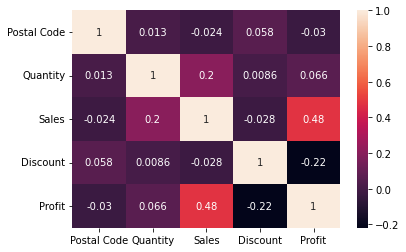

In [21]:
#Heatmap
import seaborn as sns
sns.heatmap(corr,annot=True)

 Problem Statement: Sales Data Analysis-I
 
 Load the “sample_superstore.csv”dataset provided  a DataFrame, using the Matplotlib library, plot the following insights from the dataset:
 
 1.Compare the total sales for each category of products
 
 2.Number of deals in each state of America
 
 Note:You can use any plot of your choice to show the insights

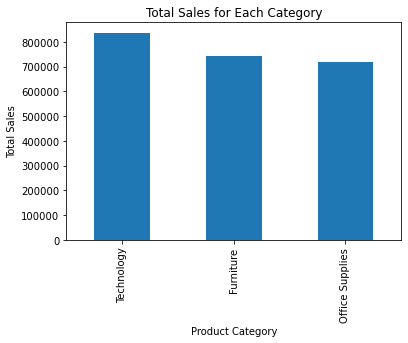

In [22]:
import matplotlib.pyplot as plt
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar')
plt.title('Total Sales for Each Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

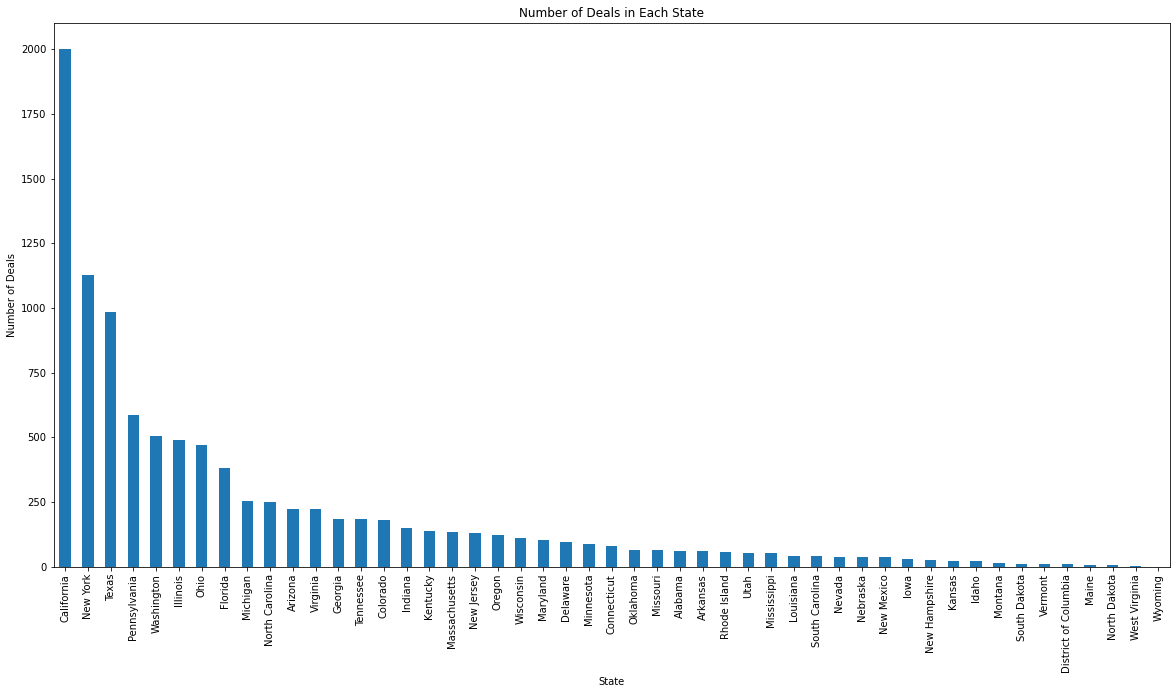

In [23]:
deals_per_state = df['State'].value_counts()
plt.figure(figsize=(20, 10))
deals_per_state.plot(kind='bar')
plt.title('Number of Deals in Each State')
plt.xlabel('State')
plt.ylabel('Number of Deals')
plt.show()

In [24]:
df = pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


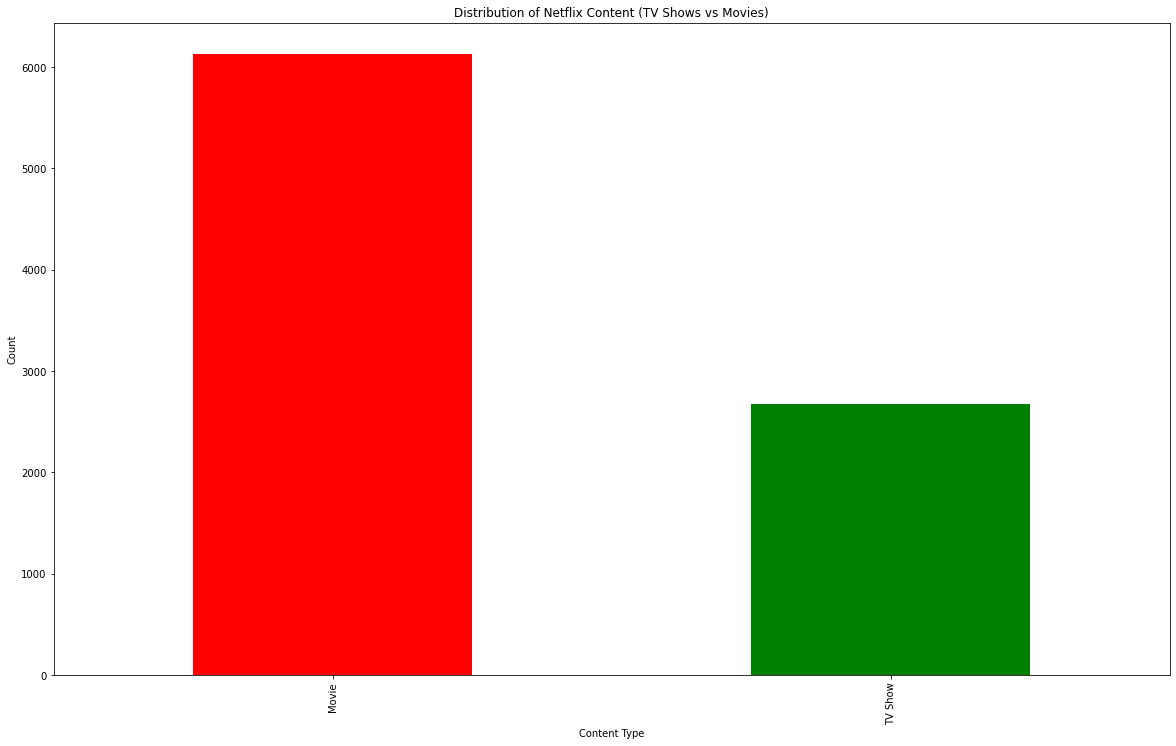

In [25]:
shows_type = df['type'].value_counts()
plt.figure(figsize=(20, 12))
shows_type.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Netflix Content (TV Shows vs Movies)')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

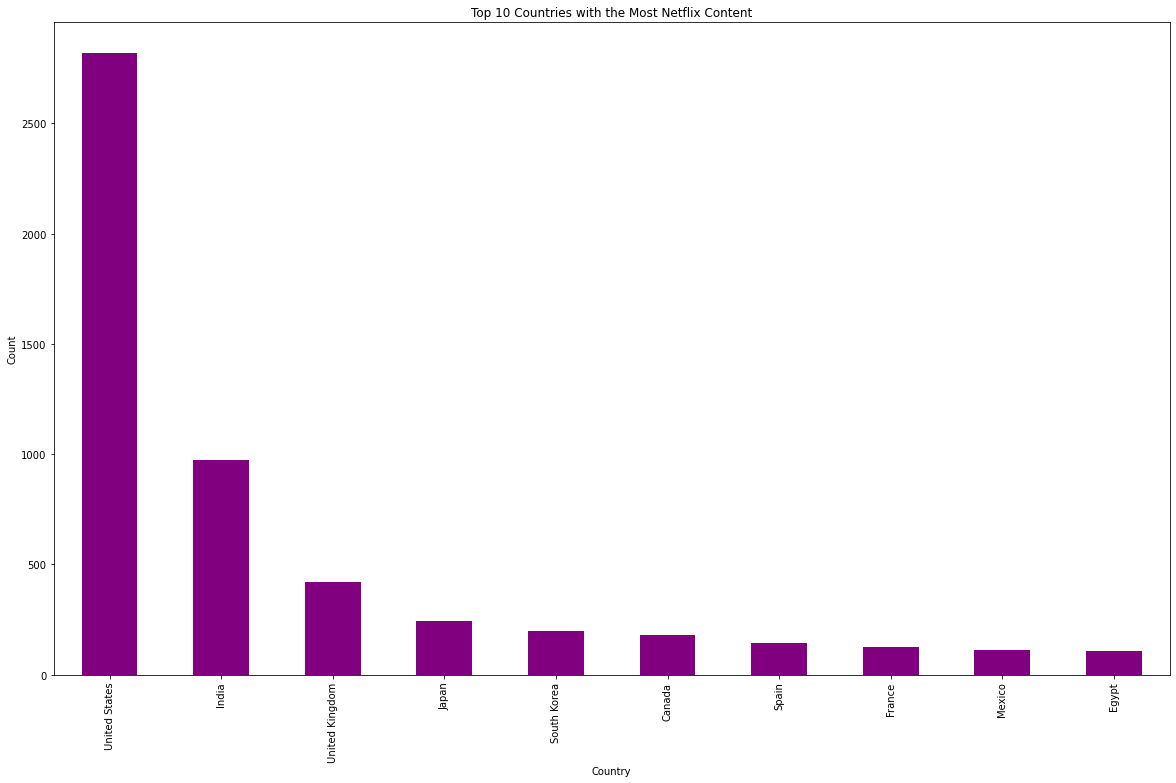

In [26]:
popular_countries = df['country'].value_counts().head(10)
# .head(10) will give us our top 10 countries, else we will be shown all of them 
plt.figure(figsize=(20, 12))
popular_countries.plot(kind='bar', color='purple')
plt.title('Top 10 Countries with the Most Netflix Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

Problem Statement: Data Visualization using Seaborn

Load the “starbucks_drinkMenu_expanded.csv”data into a DataFrame and find out which “Beverage_category”has the highest calories; plot the insights using a bar plot with the help of theSeabornlibrary.

In [27]:
df = pd.read_csv('starbucks_drinkMenu_expanded.csv')
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [28]:
highest_beverage_category = df.groupby('Beverage_category')['Calories'].mean().idxmax()
#we have used mean for all the calorie values of Beverage of same category and idxmax function to find the maximum in it
highest_beverage_category

'Smoothies'

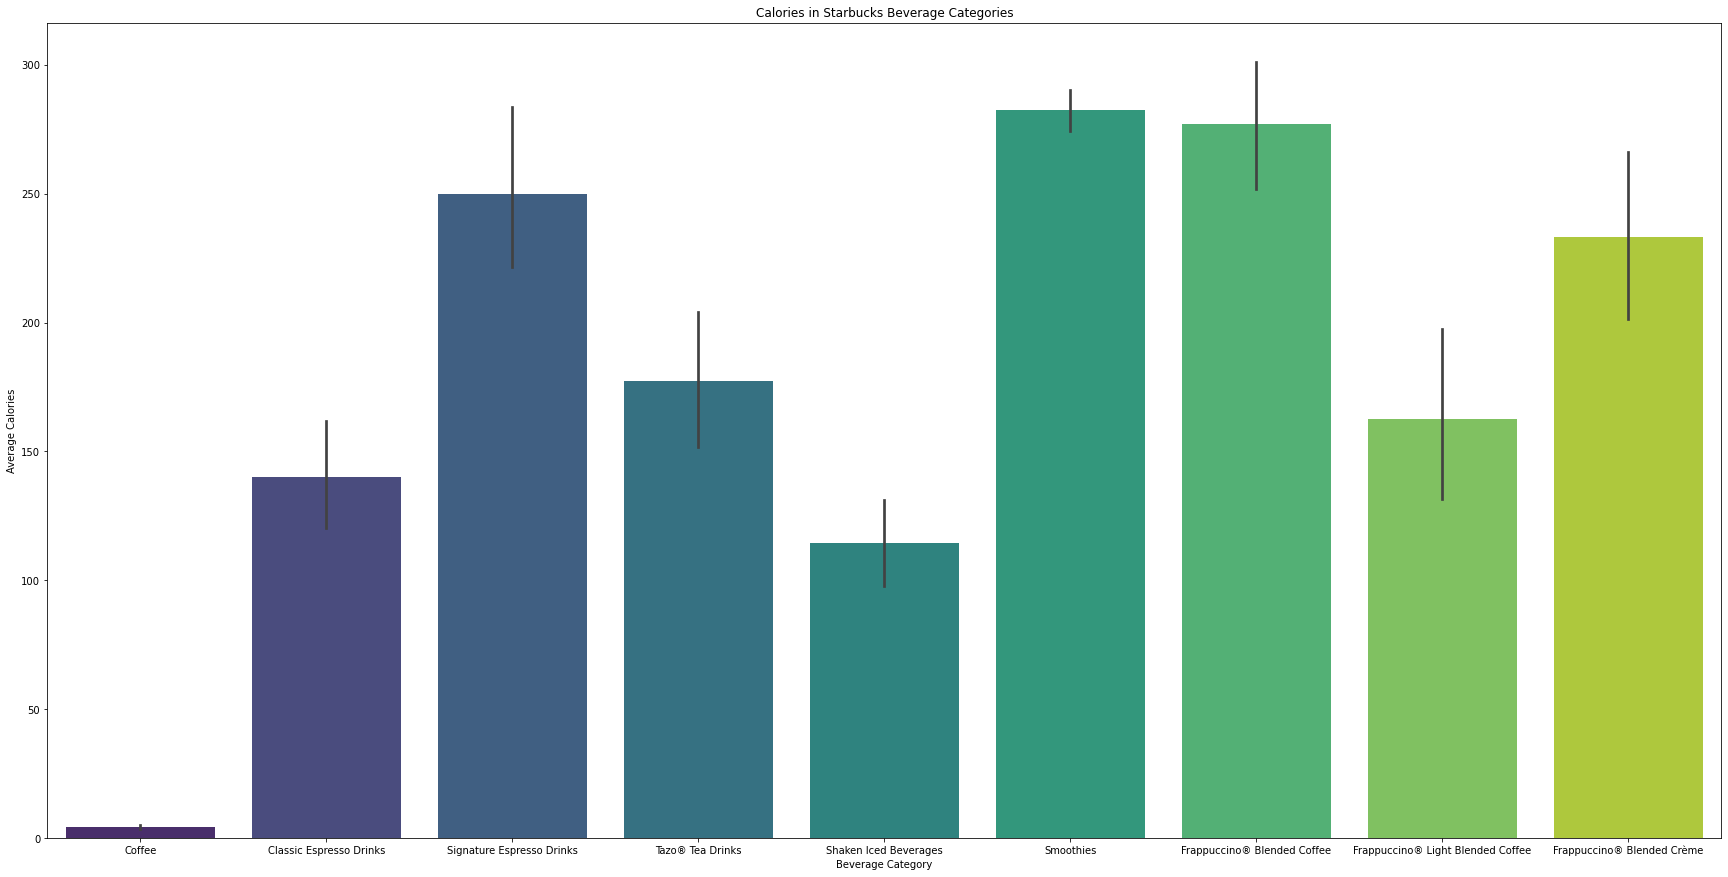

In [29]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Beverage_category', y='Calories', data=df, palette='viridis')
plt.title('Calories in Starbucks Beverage Categories')
plt.xlabel('Beverage Category')
plt.ylabel('Average Calories')
plt.show()